In [1]:
pip install rasterio

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 20.1/20.1 MB 64.3 MB/s eta 0:00:00


In [12]:
import rasterio
import numpy as np

# Open the satellite image
with rasterio.open('/content/city map chennai.jpg') as src:
    image_data = src.read()
    meta = src.meta

# Normalize the image data to the range 0-255
image_data_norm = (image_data - np.min(image_data)) / (np.max(image_data) - np.min(image_data)) * 255

# Convert the data type to uint8
image_data_norm = image_data_norm.astype(np.uint8)

# Create a grayscale image
image_data_gray = np.mean(image_data_norm, axis=0)

# Create a 3-channel color image from the grayscale image
image_data_colored = np.stack((image_data_gray, image_data_gray, image_data_gray), axis=2)

# Save the colored image to a new file
with rasterio.open('colored_image.jpg', 'w', **meta) as dst:
    dst.write(image_data_colored.transpose(2, 0, 1).astype(np.uint8))


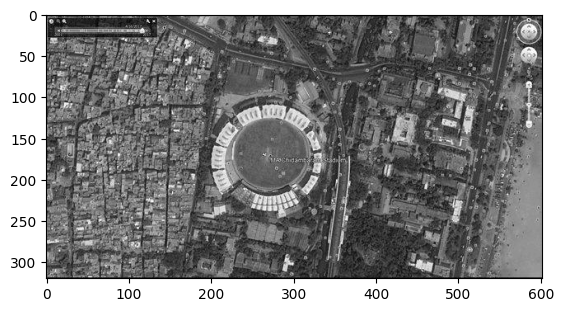

In [13]:
import matplotlib.pyplot as plt

# Load the colored image
with rasterio.open('colored_image.jpg') as src:
    image_data = src.read()

# Get the first band of the image data
image_data_band = image_data[0]

# Display the image using matplotlib
plt.imshow(image_data_band, cmap='gray')
plt.show()